# Wrapper Methods: Obesity

## Introduction
This project explores wrapper methods to choose a smaller feature subset to fit a logistic regression model which predicts obesity based on lifestyle. Wrapper methods explored are: sequential forward selection, sequential backward floating selection, and recursive feature elimination. Model accuracy will be used to evaluate and compare the methods.
Note: This project is based on Codecademy's project on [Wrapper Methods](https://www.codecademy.com/paths/fe-path-feature-engineering/tracks/fe-feature-selection-methods/modules/fe-wrapper-methods/projects/fe-wrapper-methods-project). 

## Dataset
The dataset estimates obesity from eating and physical conditions from survey results, and was obtained from the UCI Machine Learning Repository: [Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition). 

The data set `obesity` contains 18 predictor variables (with some transformations described later):
* `Gender` is `1` if a respondent is male and `0` if a respondent is female.
* `Age` is a respondent's age in years.
* `family_history_with_overweight` is `1` if a respondent has family member who is or was overweight, `0` if not.
* `FAVC` is `1` if a respondent eats high caloric food frequently, `0` if not.
* `FCVC` is `1` if a respondent usually eats vegetables in their meals, `0` if not.
* `NCP` represents how many main meals a respondent has daily (`0` for 1-2 meals, `1` for 3 meals, and `2` for more than 3 meals).
* `CAEC` represents how much food a respondent eats between meals on a scale of `0` to `3`.
* `SMOKE` is `1` if a respondent smokes, `0` if not.
* `CH2O` represents how much water a respondent drinks on a scale of `0` to `2`.
* `SCC` is `1` if a respondent monitors their caloric intake, `0` if not.
* `FAF` represents how much physical activity a respondent does on a scale of `0` to `3`.
* `TUE` represents how much time a respondent spends looking at devices with screens on a scale of `0` to `2`.
* `CALC` represents how often a respondent drinks alcohol on a scale of `0` to `3`.
* `Automobile`, `Bike`, `Motorbike`, `Public_Transportation`, and `Walking` indicate a respondent's primary mode of transportation. Their primary mode of transportation is indicated by a `1` and the other columns will contain a `0` (one-hot-encoded from original column of `MTRANS`).

The outcome variable, `NObeyesdad`, is a `1` if a patient is obese and a `0` if not (original column had nominal scaling which was binarized).

## Set Up
Import libraries and data.

In [186]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE


In [187]:
# Load data
obesity = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Data Exploration
Data will be initially explored qualitatively and quantitively to discover information about the columns and data. 

In [188]:
# output general information about the dataset
print("Information about dataframe:")
obesity.info()

print("\n---\n")

print("Number of unique values in each column:")
obesity.nunique()

Information about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF  

Gender                               2
Age                               1402
Height                            1574
Weight                            1525
family_history_with_overweight       2
FAVC                                 2
FCVC                               810
NCP                                635
CAEC                                 4
SMOKE                                2
CH2O                              1268
SCC                                  2
FAF                               1190
TUE                               1129
CALC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [189]:
print("\nSummary statistics about quantitative columns:")
obesity.describe()


Summary statistics about quantitative columns:


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Based on the above, the following can be concluded about the columns:
* Categorical variables/features
    * Binary and object datatype: Gender, family_history_with_overweight, FAVC, SMOKE, SCC
    * Ordinal: CAEC, CALC
    * Nominal: MTRANS
* all others are numerical features/variables
* Nobesydad is the target variable, and is currently a nominal categorical variable

### Transforming Data
Since logistic regression is to be performed, the data has to be transformed into fully numerical data as follows:
* Binary columns will have values mapped as no = 0 / yes = 1 or male = 0 / female = 1
* Ordinal columns will have values values mapped from 0 (low) to n (high)
* Nominal columns will be one-hot encoded
* Target variable will be binarized as (any obese state) = 1 / (any non-obese state) = 0

In [190]:
# Binarizing Columns
binary_cols = ["Gender", "family_history_with_overweight", "FAVC", "SMOKE", "SCC"]
print("Before binarizing: ")
print(obesity[binary_cols].head()) 

for col in binary_cols:
    if col == "Gender":
        obesity[col] = obesity[col].map({"Male": 1, "Female": 0})
    else:
        obesity[col] = obesity[col].map({"no": 0, "yes": 1})
print("\nAfter binarizing")
print(obesity[binary_cols].head())


Before binarizing: 
   Gender family_history_with_overweight FAVC SMOKE  SCC
0  Female                            yes   no    no   no
1  Female                            yes   no   yes  yes
2    Male                            yes   no    no   no
3    Male                             no   no    no   no
4    Male                             no   no    no   no

After binarizing
   Gender  family_history_with_overweight  FAVC  SMOKE  SCC
0       0                               1     0      0    0
1       0                               1     0      1    1
2       1                               1     0      0    0
3       1                               0     0      0    0
4       1                               0     0      0    0


In [191]:
# Ordinal Columns Mapping

# look at possible values
print("Before mapping: ")
print(obesity["CAEC"].unique())
print(obesity["CALC"].unique()) 

ordinal_cols = ["CAEC", "CALC"]

print(obesity[ordinal_cols].head())

for col in ordinal_cols:
    obesity[col] = obesity[col].map({"no":0, "Sometimes":1, "Frequently":2, "Always":3})

print("\nAfter mapping: ")
print(obesity[ordinal_cols].head())
print(obesity["CAEC"].unique())
print(obesity["CALC"].unique())


Before mapping: 
['Sometimes' 'Frequently' 'Always' 'no']
['no' 'Sometimes' 'Frequently' 'Always']
        CAEC        CALC
0  Sometimes          no
1  Sometimes   Sometimes
2  Sometimes  Frequently
3  Sometimes  Frequently
4  Sometimes   Sometimes

After mapping: 
   CAEC  CALC
0     1     0
1     1     1
2     1     2
3     1     2
4     1     1
[1 2 3 0]
[0 1 2 3]


In [192]:
# One-hot encoding
print(obesity["MTRANS"].unique()) # look at possible values: ['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

mtrans_ohe = pd.get_dummies(obesity['MTRANS'], dtype=int) # one-hot encode the MTRANS column
obesity = obesity.join(mtrans_ohe)
obesity.drop("MTRANS", axis=1, inplace=True) # can (optionally) drop the MTRANS column to save memory

print("\nAfter one-hot encoding MTRANS:")
obesity.head()

['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']

After one-hot encoding MTRANS:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,SCC,FAF,TUE,CALC,NObeyesdad,Automobile,Bike,Motorbike,Public_Transportation,Walking
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,...,0,0.0,1.0,0,Normal_Weight,0,0,0,1,0
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,...,1,3.0,0.0,1,Normal_Weight,0,0,0,1,0
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,...,0,2.0,1.0,2,Normal_Weight,0,0,0,1,0
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,...,0,2.0,0.0,2,Overweight_Level_I,0,0,0,0,1
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,...,0,0.0,0.0,1,Overweight_Level_II,0,0,0,1,0


In [193]:
# Target variable
print("Possible values for NObeyesdad: ", obesity["NObeyesdad"].unique()) # look at possible values
# possible values: ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II', 'Obesity_Type_I', 
#                   'Insufficient_Weight' 'Obesity_Type_II', 'Obesity_Type_III']
print("\nBefore binarizing target variable: ")
print(obesity["NObeyesdad"].head(10))

obesity["NObeyesdad"] = obesity["NObeyesdad"].apply(lambda w: 1 if "Obesity" in w else 0)
print("\nAfter binarizing target variable: ")
print(obesity["NObeyesdad"].head(10))

Possible values for NObeyesdad:  ['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']

Before binarizing target variable: 
0          Normal_Weight
1          Normal_Weight
2          Normal_Weight
3     Overweight_Level_I
4    Overweight_Level_II
5          Normal_Weight
6          Normal_Weight
7          Normal_Weight
8          Normal_Weight
9          Normal_Weight
Name: NObeyesdad, dtype: object

After binarizing target variable: 
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: NObeyesdad, dtype: int64


## Logistic Regression (LR) Model
To create a logistic regression model, the following steps are performed:
1. data preparation of splitting into predictor `X` and target `y` dataframes
1. fitting base LR model (i.e. with all features)

NOTE: Theoretically, a train-test split should be done before fitting a model. Since this project focuses rather on wrapper methods, this step was skipped for simplit

In [194]:
# data preparation into predictor and target dataframes
X = obesity.drop(columns=["Height", "Weight", "NObeyesdad"], axis=1)
y = obesity["NObeyesdad"]


In [195]:
# train-test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [196]:
# LR model
lr = LogisticRegression(max_iter=1000) # create
lr.fit(X_train, y_train) # train
# train and test score
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print(f"The base LR model achieves a training score of {lr_train_score}, and a testing score of {lr_test_score}")

The base LR model achieves a training score of 0.7542315504400813, and a testing score of 0.7823343848580442


## Feature Selection: Sequential Forward Selection
The first wrapper method, sequential forward selection, is explored. 

In [197]:
# create and fit sfs model
sfs = SFS(estimator=lr, k_features=9, scoring="accuracy", cv=0, forward=True, floating=False)
sfs.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,k_features,"(9, ...)"
,forward,True
,floating,False
,verbose,0
,scoring,'accuracy'
,cv,0
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


In [198]:
# inspect the results of SFS
print("The results of SFS are:\n", sfs.subsets_[9])
print("\nThe chosen features are:\n", sfs.subsets_[9]["feature_names"])

sfs_score = sfs.subsets_[9]["avg_score"]
print(f"\nThe sfs-based LR model with 9 best features achieves a training score of {sfs_score}.")

The results of SFS are:
 {'feature_idx': (0, 1, 2, 3, 6, 9, 10, 15, 17), 'cv_scores': array([0.78605281]), 'avg_score': np.float64(0.7860528097494922), 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Motorbike', 'Walking')}

The chosen features are:
 ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF', 'Motorbike', 'Walking')

The sfs-based LR model with 9 best features achieves a training score of 0.7860528097494922.


### Visualize SFS model accuracy
The original model had a training score of 0.7542315504400813, while the sfs-based model with 9 best features had a training score of 0.7860528097494922. This shows that the sfs method increased the accuracy. 

The results of sequential forward selection are plotted, to visualize how the number of features affects performance. It can be seen that the accuracy plateaus around 7 or 8 features; for computational purposes, even a feature set of 6 features is very acceptable. 

c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:903: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


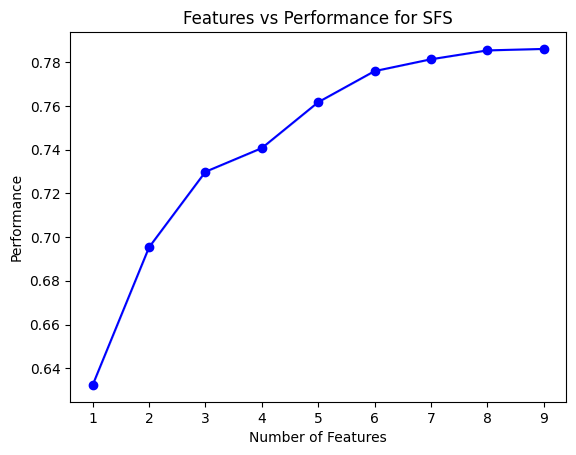

In [199]:
plot_sfs(sfs.get_metric_dict())
plt.title("Features vs Performance for SFS")
plt.show()

In [200]:
# inspect the results of SFS - 7
print("The results of SFS (with best features n=7) are:\n", sfs.subsets_[7])
print("\nThe chosen features are:\n", sfs.subsets_[7]["feature_names"])

sfs_score = sfs.subsets_[7]["avg_score"]
print(f"\nThe sfs-based LR model with 7 best features achieves a training score of {sfs_score}.")

The results of SFS (with best features n=7) are:
 {'feature_idx': (0, 1, 2, 3, 6, 9, 10), 'cv_scores': array([0.78131347]), 'avg_score': np.float64(0.7813134732566012), 'feature_names': ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')}

The chosen features are:
 ('Gender', 'Age', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'FAF')

The sfs-based LR model with 7 best features achieves a training score of 0.7813134732566012.


## Feature Selection: Sequential Backward Selection
The second wrapper method, sequential backward selection, is explored. 

In [201]:
# create and fit sbs model
sbs = SFS(estimator=lr, k_features=3, scoring="accuracy", cv=0, forward=False, floating=False)
sbs.fit(X_train, y_train)

,estimator,LogisticRegre...max_iter=1000)
,k_features,"(3, ...)"
,forward,False
,floating,False
,verbose,0
,scoring,'accuracy'
,cv,0
,n_jobs,1
,pre_dispatch,'2*n_jobs'
,clone_estimator,True
,fixed_features,None


### Visualize SFS model accuracy
The results of sequential backward selection are plotted, to visualize how the number of features affects performance. It can be seen that the accuracy is highest with 7-17 features; for computational reasons, the 7 best features should be chosen. 

The original model had a training score of 0.7542315504400813, while the sfs-based model with 9 best features had a training score of 0.7596479350033852. This shows that the sbs method marginally increased accuracy. 


c:\Users\Michelle\AppData\Local\Programs\Python\Python314\Lib\site-packages\mlxtend\feature_selection\sequential_feature_selector.py:903: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


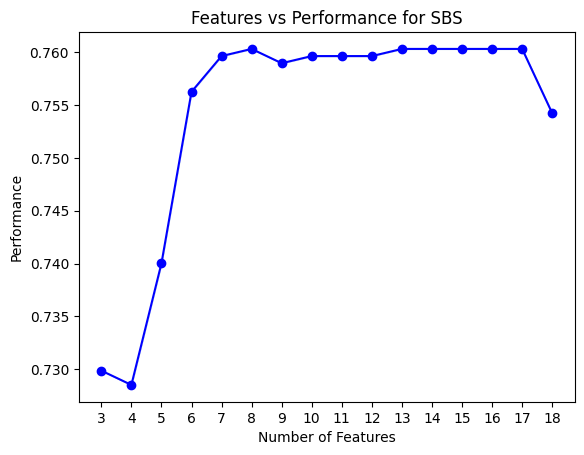

In [202]:
plot_sfs(sbs.get_metric_dict())
plt.title("Features vs Performance for SBS")
plt.show()

In [203]:
# inspect the results of SBS
print("The results of SBS are:\n", sbs.subsets_[7])
print("\nThe chosen features are:\n", sbs.subsets_[7]["feature_names"])

sbs_score = sbs.subsets_[7]["avg_score"]
print(f"\nThe sfs-based LR model with 7 best features achieves a training score of {sbs_score}.")

The results of SBS are:
 {'feature_idx': (1, 2, 3, 4, 6, 9, 16), 'cv_scores': array([0.75964794]), 'avg_score': np.float64(0.7596479350033852), 'feature_names': ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')}

The chosen features are:
 ('Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Public_Transportation')

The sfs-based LR model with 7 best features achieves a training score of 0.7596479350033852.


## Feature Selection: Recursive Feature Elimination
The third wrapper method, recursive feature elimination, is explored. 

In [204]:
features = X.columns # get feature names (necessary for later steps)

# standardize data
X_train_std = pd.DataFrame(StandardScaler().fit_transform(X_train))

In [205]:
# create and fit ecursive feature elimination model
rfe = RFE(estimator=lr, n_features_to_select=8)
rfe.fit(X_train_std, y_train)

,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",LogisticRegre...max_iter=1000)
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",8
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",1
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True


In [206]:
# inspect the results of RFE
rfe_features = [f for (f, support) in zip(features, rfe.support_) if support]
print("The chosen features of RFE are: ", rfe_features)

rfe_train_score = rfe.score(X_train_std, y_train)
print(f"\nThe rfe-based LR model achieves a training score of {rfe_train_score}.")

The chosen features of RFE are:  ['Age', 'family_history_with_overweight', 'FAVC', 'FCVC', 'CAEC', 'SCC', 'Automobile', 'Walking']

The rfe-based LR model achieves a training score of 0.7610020311442113.
